 # Exercice de classification : consommation MpG
 
 test

In [2]:
# Import des librairies

import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import figure, subplot, hist, xlim, show, plot
%matplotlib inline

 

import pandas as pd
import pylab as pl
import numpy as np

from pandas.plotting import scatter_matrix
from pandas.plotting import boxplot
from pandas.plotting import parallel_coordinates

In [3]:
#data importand creation of panda object
data_panda = pd.read_csv('mpgTrainingSet-headings.csv')

Check that import went well. 
Display the columns names

In [4]:
print(data_panda.keys())

Index(['Consumption', 'Cylinders', 'Cubic_inch', 'Horsepower', 'Weight',
       'Acceleration', 'Brand', 'Car_name'],
      dtype='object')


In [5]:
data_panda.dtypes

Consumption       int64
Cylinders         int64
Cubic_inch      float64
Horsepower      float64
Weight            int64
Acceleration    float64
Brand            object
Car_name         object
dtype: object

We can also display the names of species and their repartition.

In [6]:
data_panda['Consumption'].value_counts()

Consumption
20    85
15    73
25    64
30    58
35    37
40    11
10     8
45     6
Name: count, dtype: int64

In [7]:
data_panda.groupby('Car_name').describe()

Consumption                                                       \
                count       mean       std   min    25%   50%    75%   max   
Car_name                                                                     
100ls             2.0  22.500000  3.535534  20.0  21.25  22.5  23.75  25.0   
12                1.0  25.000000       NaN  25.0  25.00  25.0  25.00  25.0   
124               1.0  25.000000       NaN  25.0  25.00  25.0  25.00  25.0   
124_sport         1.0  25.000000       NaN  25.0  25.00  25.0  25.00  25.0   
128               1.0  25.000000       NaN  25.0  25.00  25.0  25.00  25.0   
...               ...        ...       ...   ...    ...   ...    ...   ...   
vista             1.0  10.000000       NaN  10.0  10.00  10.0  10.00  10.0   
volare            3.0  18.333333  2.886751  15.0  17.50  20.0  20.00  20.0   
woody             1.0  25.000000       NaN  25.0  25.00  25.0  25.00  25.0   
x1.9              1.0  30.000000       NaN  30.0  30.00  30.0  30.00  30.0   
zephyr            2.0  20.000000  0.000000  20.0  20.00  20.0  20.00  20.0   

          Cylinders            ...  Weight         Acceleration             \
              count      mean  ...     75%     max        count       mean   
Car_name                       ...                                           
100ls           2.0  4.000000  ...  2666.0  2694.0          2.0  14.500000   
12              1.0  4.000000  ...  2189.0  2189.0          1.0  18.000000   
124             1.0  4.000000  ...  2246.0  2246.0          1.0  14.000000   
124_sport       1.0  4.000000  ...  2265.0  2265.0          1.0  15.500000   
128             1.0  4.000000  ...  2108.0  2108.0          1.0  15.500000   
...             ...       ...  ...     ...     ...          ...        ...   
vista           1.0  8.000000  ...  4499.0  4499.0          1.0  12.500000   
volare          3.0  6.666667  ...  3785.0  3940.0          3.0  16.033333   
woody           1.0  4.000000  ...  2164.0  2164.0          1.0  22.100000   
x1.9            1.0  4.000000  ...  2000.0  2000.0          1.0  16.000000   
zephyr          2.0  6.000000  ...  3050.0  3070.0          2.0  17.450000   

                                                        
                std   min     25%    50%     75%   max  
Car_name                                                
100ls      0.707107  14.0  14.250  14.50  14.750  15.0  
12              NaN  18.0  18.000  18.00  18.000  18.0  
124             NaN  14.0  14.000  14.00  14.000  14.0  
124_sport       NaN  15.5  15.500  15.50  15.500  15.5  
128             NaN  15.5  15.500  15.50  15.500  15.5  
...             ...   ...     ...    ...     ...   ...  
vista           NaN  12.5  12.500  12.50  12.500  12.5  
volare     2.466441  13.2  15.200  17.20  17.450  17.7  
woody           NaN  22.1  22.100  22.10  22.100  22.1  
x1.9            NaN  16.0  16.000  16.00  16.000  16.0  
zephyr     1.060660  16.7  17.075  17.45  17.825  18.2  

[262 rows x 48 columns]

In [8]:
#Couleur en fonction des consommations
colors = np.where(data_panda['Consumption']>=40,'g','-')
colors[data_panda['Consumption']<40]= 'b'

colors[data_panda['Consumption']<20] = 'r'
#print(colors)
color_dict={'haute':'r','basse':'g' ,'moyenne':'b'}

## Visualisation




In [9]:
Input_cols = ['Cylinders','Cubic_inch','Horsepower','Weight','Acceleration','Brand','Car_name']

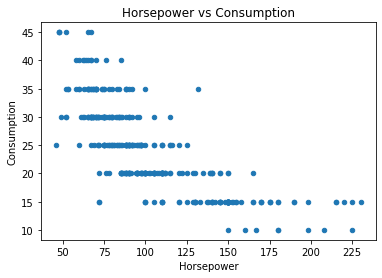

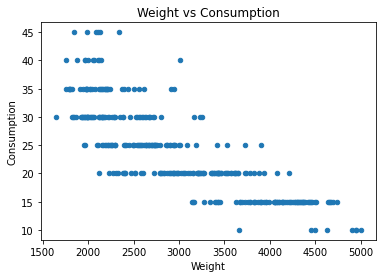

In [10]:
# on représente ainsi la longeur des pétales  en fonction de la longueur des sépales 

data_panda.plot(kind="scatter", x='Horsepower', y='Consumption')

plt.title('Horsepower vs Consumption') 
plt.show()

data_panda.plot(kind="scatter", x='Weight', y='Consumption')

plt.title('Weight vs Consumption') 
plt.show()


We can use the defined colors to stress out the species.

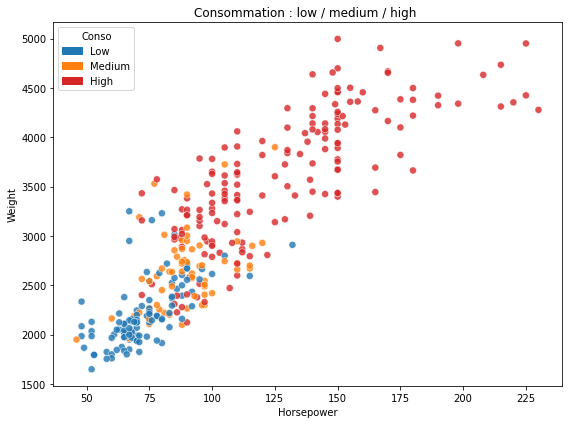

In [11]:
# ...existing code...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

def plot_with_color_groups(df, consumption_col='consumption', x_col='x', y_col='y', mode='quantile',title=''):
    # 1) définir les groupes: low / medium / high
    if mode == 'quantile':
        q1, q2 = df[consumption_col].quantile([0.33, 0.66])
        bins = [-np.inf, q1, q2, np.inf]
    else:
        # seuils fixes (exemple)
        low_thresh, high_thresh = 10, 30
        bins = [-np.inf, low_thresh, high_thresh, np.inf]

    df['conso_group'] = pd.cut(df[consumption_col], bins=bins, labels=['high', 'medium', 'low'])

    # 2) palette / color dict
    color_dict = {'low': '#1f77b4', 'medium': '#ff7f0e', 'high': '#d62728'}

    # Vérifier qu'on a bien les trois groupes (sinon ajouter un fallback)
    groups_present = df['conso_group'].astype(str).unique().tolist()
    for g in groups_present:
        if g == 'nan':
            continue
        if g not in color_dict:
            color_dict[g] = '#888888'  # fallback

    # 3) Plot: seaborn scatterplot avec palette fixe
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='conso_group', palette=color_dict, alpha=0.8, s=50)
    plt.title('Consommation : low / medium / high '+title)

    # 4) custom legend si nécessaire (conserver l'ordre low, medium, high)
    legend_handles = [Patch(color=color_dict[k], label=k.capitalize()) for k in ['low', 'medium', 'high']]
    plt.legend(handles=legend_handles, title='Conso')
    plt.tight_layout()
    plt.show()


# Exemple d'utilisation
plot_with_color_groups(data_panda, consumption_col='Consumption', x_col='Horsepower', y_col='Weight', mode='quantile')


We can also use histograms and compare the distribution .


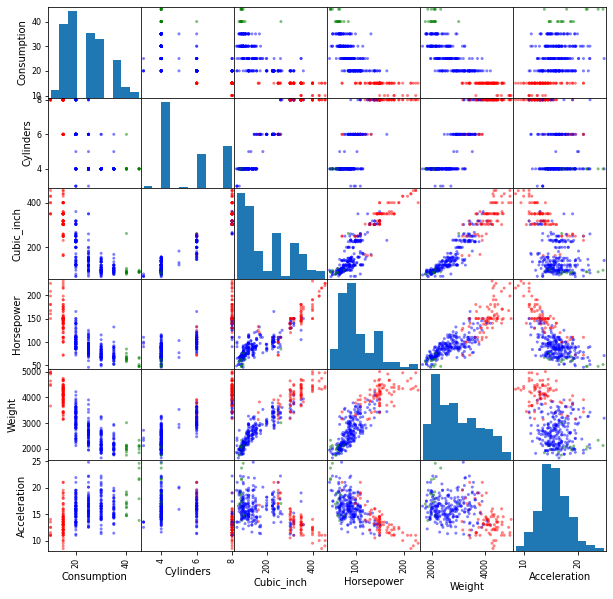

In [12]:
scatter_matrix(data_panda, figsize=(10, 10), diagonal='hist', c=colors);

We can also use boxplots.

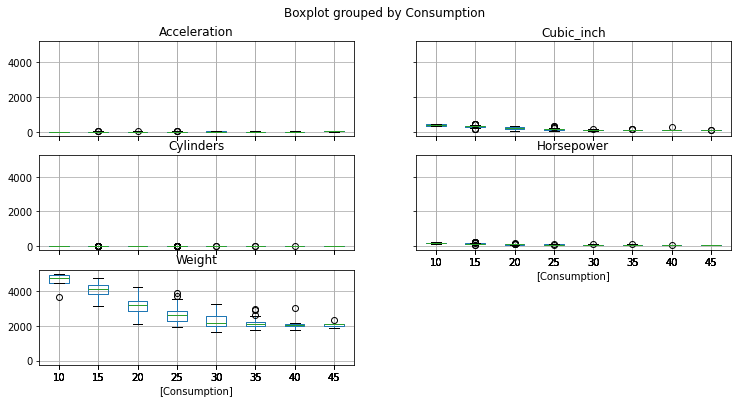

In [13]:
data_panda.boxplot(by='Consumption', figsize=(12, 6));

These graphics can give us ideas to ease the classification. for instance we can see that  Iris Setosa have smaller Sepal than Iris Virginica.

# Pre treatment
## Normalization

To garanty that the use of Euclidan distances will not favor one characteristics, we need to work on normalized data.

In [14]:
#normalisation
import copy
Norm=copy.deepcopy(data_panda.iloc[:, :5])
Norm = Norm.apply(pd.to_numeric, downcast='integer', errors='coerce')
print(Norm)
print(Norm.dtypes)
Input_cols = ['Cylinders','Cubic_inch','Horsepower','Weight','Acceleration']
Norm[Input_cols]=(data_panda[Input_cols]-data_panda[Input_cols].min())/(data_panda[Input_cols].max()-data_panda[Input_cols].min())
print(Norm.keys())

     Consumption  Cylinders  Cubic_inch  Horsepower  Weight
0             35          4          79          58    1825
1             25          4          96          69    2189
2             25          4          98          90    2265
3             25          4         116          75    2246
4             30          4          68          49    1867
..           ...        ...         ...         ...     ...
337           30          4          79          67    2000
338           20          6         200          85    3070
339           20          6         200          85    2990
340           25          4         108          93    2391
341           30          4          97          67    2065

[342 rows x 5 columns]
Consumption     int8
Cylinders       int8
Cubic_inch     int16
Horsepower     int16
Weight         int16
dtype: object
Index(['Consumption', 'Cylinders', 'Cubic_inch', 'Horsepower', 'Weight',
       'Acceleration'],
      dtype='object')


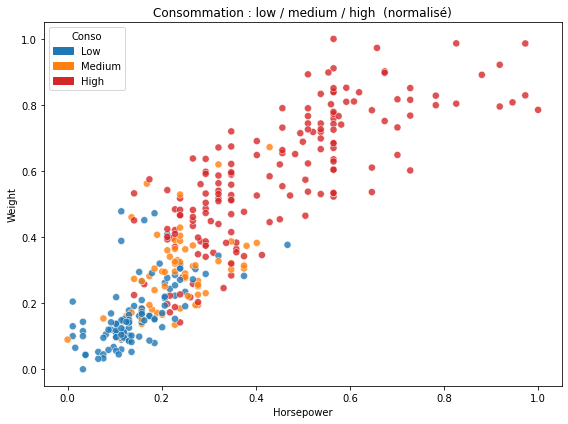

In [15]:
plot_with_color_groups(Norm, consumption_col='Consumption', x_col='Horsepower', y_col='Weight', mode='quantile', title=' (normalisé)')


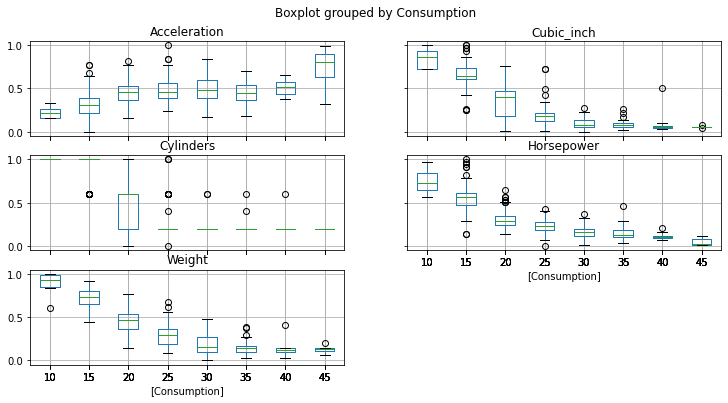

In [16]:
Norm.boxplot(by='Consumption', figsize=(12, 6));

## Encoding
Some methods can only use numerical data. In order to use them we need to transform the target values into integers.

In [17]:
    #transformation des espèces en numéro de classe
Norm.Consumption=Norm.Consumption.astype('category')
Norm['Consumption_encoded'],dict_cat=Norm.Consumption.factorize()
  # le dictionnaire d encodage est stocké dans le vecteur dict_cat
print(dict_cat)


CategoricalIndex([35, 25, 30, 40, 20, 15, 45, 10], categories=[10, 15, 20, 25, 30, 35, 40, 45], ordered=False, dtype='category')


In [18]:
  #créons le dictionnaire des couleurs associé
"""color_dict_encoded={}
for i in range (0, 8):
      color_dict_encoded[i]=color_dict[dict_cat[i]]
print(color_dict_encoded)"""

#ignoré pr l'instant

'color_dict_encoded={}\nfor i in range (0, 8):\n    color_dict_encoded[i]=color_dict[dict_cat[i]]\nprint(color_dict_encoded)'

## Principal component analysis


Principal component analysis project data in a space where variance is maximized. 
This means that if 2 points are different in a n-dimension space they should not overlap in the 2-dimension PCA space.

Lets determine the lost information.

In [19]:
from sklearn.decomposition import PCA
for i in range(1,5):

    pca = PCA(n_components=i)

    pca.fit(Norm[Input_cols])

    print (i, 'components representa data loss of' ,(1-sum(pca.explained_variance_ratio_)) * 100,'%')


1 components representa data loss of 12.253631817250799 %
2 components representa data loss of 4.714797246367719 %
3 components representa data loss of 1.525242845646757 %
4 components representa data loss of 0.7333650470021991 %


We will use the 2-D representation for visualization.
If the algortihmes take too long we should decide which PCA recduction is an acceptable loss.

In [20]:
n_components=2
pca = PCA(n_components)
pca.fit(Norm[Input_cols])
pca_apply = pca.transform(Norm[Input_cols])

We can identify the composition of those 2 components from the 4 initial dimensions.

In [21]:
base=pd.DataFrame(pca.components_,columns=Norm[Input_cols].columns,index = ['PCA0','PCA1'])            
print(base)

      Cylinders  Cubic_inch  Horsepower    Weight  Acceleration
PCA0   0.630701    0.496700    0.351343  0.449673     -0.172791
PCA1   0.205419    0.067296   -0.346144  0.245849      0.879214


In [22]:
pcad_panda=pd.DataFrame(pca_apply, columns=['PCA%i' % i for i in range(n_components)]) #save in a panda object
Norm=pd.concat([Norm, pcad_panda], axis=1)#concatenate in norm_pd
print(Norm.keys())

Index(['Consumption', 'Cylinders', 'Cubic_inch', 'Horsepower', 'Weight',
       'Acceleration', 'conso_group', 'Consumption_encoded', 'PCA0', 'PCA1'],
      dtype='object')


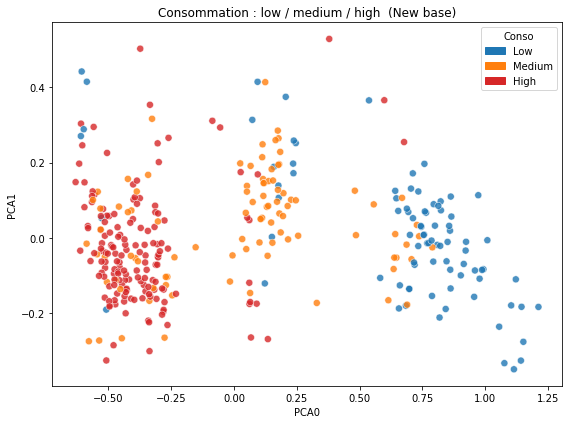

In [23]:
#visualization
plot_with_color_groups(Norm, consumption_col='Consumption_encoded', x_col='PCA0', y_col='PCA1', mode='quantile', title=' (New base)')




## Classification

Classification enables to assoign a category to a specimen. 2 steps are required:
- Learning
- Prediction.

Python librairy "sklearn" has numerous classification models. Here we will use Gaussian Naive Bayes to determine the species of the iris.


# Gaussian Naive Bayes 



The data should then be split in 2 groups:
- learning set
- test set

This split can be done manually by an expert (which will be the case for the car example) or can be done randomly wiht the "train_test_split" function.

In this case, the expert should only choose the  % of each group. Here we choose  40% of the specimens for the training set.

In [24]:
from sklearn.model_selection import train_test_split

#Learning population is called train,
#the target value (species) t_train
#test population is called test
#the predicted value t_test

train, test, t_train, t_test = train_test_split(Norm, Norm['Consumption_encoded'], test_size=0.4, random_state=0)
#print(train)
#print(test)

Lest visualize the repartition between the 2 sets

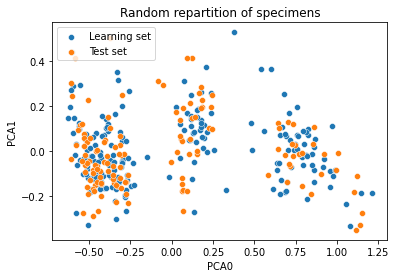

In [25]:
sns.scatterplot(x='PCA0',y='PCA1', data=train)
sns.scatterplot(x='PCA0',y='PCA1', data=test)

pl.xlabel('PCA0')
pl.ylabel('PCA1')
plt.legend( loc='upper left', labels=['Learning set', 'Test set'])
pl.title('Random repartition of specimens') 

plt.show()
    
    

1st step - learning.

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier_GNB=GaussianNB()
#Learning
classifier_GNB.fit(train[Input_cols],train['Consumption_encoded']) # train
#Prediction
prediction_train =classifier_GNB.predict(train[Input_cols]) #prediction


In [27]:
#comparaison prédiction avec réalité

for i in range (0,10):
    print('Véhicule ', i+1, ': consommation réelle = ', dict_cat[train['Consumption_encoded'].iloc[i]], ', prédiction = ', dict_cat[prediction_train[i]],'encodé : ',train['Consumption_encoded'].iloc[i])

Véhicule  1 : consommation réelle =  15 , prédiction =  15 encodé :  5
Véhicule  2 : consommation réelle =  25 , prédiction =  15 encodé :  1
Véhicule  3 : consommation réelle =  20 , prédiction =  30 encodé :  4
Véhicule  4 : consommation réelle =  25 , prédiction =  20 encodé :  1
Véhicule  5 : consommation réelle =  35 , prédiction =  30 encodé :  0
Véhicule  6 : consommation réelle =  20 , prédiction =  30 encodé :  4
Véhicule  7 : consommation réelle =  15 , prédiction =  20 encodé :  5
Véhicule  8 : consommation réelle =  20 , prédiction =  20 encodé :  4
Véhicule  9 : consommation réelle =  15 , prédiction =  10 encodé :  5
Véhicule  10 : consommation réelle =  20 , prédiction =  20 encodé :  4


We can measure the performance  on all the train set.

In [28]:
print (classifier_GNB.score(train[Input_cols],t_train)) # test


0.33658536585365856


La performance est plutôt correcte, considérant que la prédiction de la consommation est loin d'être riviale.

In [29]:
prediction_test =classifier_GNB.predict(test[Input_cols]) #prediction
print (classifier_GNB.score(test[Input_cols],t_test)) # test

0.32116788321167883


In [30]:
prediction =classifier_GNB.predict(Norm[Input_cols]) #prediction

An evaluation tool is the confusion matrix. In this matrix columns are predicted classes and rows the real classes.


In [31]:
from sklearn.metrics import confusion_matrix
M_GNB=confusion_matrix(prediction_test,t_test)
print (M_GNB)


[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  0  2  0  0  0]
 [ 9 23 19  2  3  0  1  0]
 [ 3  1  4  3  0  0  1  0]
 [ 0  8  1  1 19  4  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  0  0  4 22  0  3]]


We can also represent this info in a graph.

/tmp/ipykernel_61002/3351213611.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conf_GNB=pd.concat([conf_GNB,new_row], ignore_index=True)


<function matplotlib.pyplot.show(close=None, block=None)>

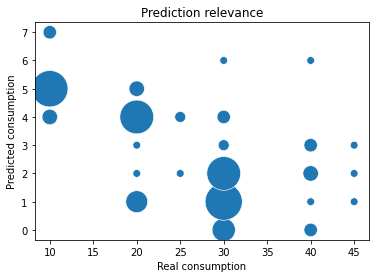

In [32]:
conf_GNB = pd.DataFrame(columns=['real','real_name','predicted','density'])
for i in range (0, 8):
    for j in range (0,8) :
        if M_GNB[i][j]>0 :
            new_row =pd.DataFrame({'real':i, 'real_name':dict_cat[i],'predicted':j, 'density':float(M_GNB[i][j])}, index=[0])
            conf_GNB=pd.concat([conf_GNB,new_row], ignore_index=True)
sns.scatterplot(x='real_name', y='predicted', s=(conf_GNB.density)*60, data=conf_GNB) 
pl.xlabel('Real consumption')
pl.ylabel('Predicted consumption')
pl.title('Prediction relevance')
show

In this representation, the errors are the non diagonal elements. Here iris versicolor were labbeled as virginica. 

Other metrics can be used.

In [33]:
from sklearn.metrics import classification_report

print (classification_report(prediction_test,t_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         3
           2       0.73      0.33      0.46        57
           3       0.43      0.25      0.32        12
           4       0.68      0.58      0.62        33
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       1.00      0.10      0.19        29

    accuracy                           0.32       137
   macro avg       0.35      0.16      0.20       137
weighted avg       0.72      0.32      0.41       137



/home/mathijs/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mathijs/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mathijs/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


- Precision : proportion of the class attributed rightfully
- Recall : proportion of elements of this class wrongfully  attributed
- F1-Score: Harmonic mean of the 2 other indicators
- support : numbre of element of this class used in the test.

To be relevant the evaluation should be done in multiple pairs (learning set/test set). 
We can then use "Cross Validation". It split the initial population several times. The performance of the classfication is the mean of the several evaluations.

In [34]:
from sklearn.model_selection import cross_val_score

# cross validation with 6 iterations 
scores = cross_val_score(classifier_GNB,Norm[Input_cols], Norm['Consumption_encoded'], cv=6)

print (scores)

[0.19298246 0.35087719 0.36842105 0.29824561 0.26315789 0.52631579]


The result is a vector with the perf for each iteration.


In [35]:
from numpy import mean

print (mean(scores))


0.3333333333333333


## Use
If we are happy with the classification we can use it to classify the whole set 

In [36]:
prediction_test_GNB =classifier_GNB.predict(Norm[Input_cols]) #prediction
pred_GNB = pd.DataFrame(prediction_test_GNB )
pred_GNB.columns = ['Prediction_GNB']

#we merge this dataframe with df
Norm= pd.concat([Norm,pred_GNB], axis = 1)

# Neuron network
For Neuron network we follow the same method: learn on a train set, apply on a test set and if we are happy with the performance use it for prediction

In [37]:
from sklearn.neural_network import MLPClassifier
classifier_NN = MLPClassifier()
#learn
classifier_NN.fit(train[Input_cols],train['Consumption_encoded']) # learning classifier.fit(input_dat, target_data)
#use on test
prediction =classifier_NN.predict(test[Input_cols]) #prediction
#evaluate on test
print (classifier_NN.score(test[Input_cols],t_test)) # test

0.44525547445255476


/home/mathijs/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


On constate que la précision du réseau de neurones est meilleure que le gaussian.

In [38]:
#application on the whole set
prediction_NN =classifier_NN.predict(Norm[Input_cols]) #prediction
pred_NN = pd.DataFrame(prediction_NN )
pred_NN.columns = ['Prediction_NN']

#we merge this dataframe with df
Norm= pd.concat([Norm,pred_NN], axis = 1)

In [39]:
M_NN=confusion_matrix(Norm['Consumption_encoded'],Norm['Prediction_NN'])
print (M_NN)

[[ 1  0 29  0  7  0  0  0]
 [ 0  1 21  0 41  1  0  0]
 [ 1  0 43  0 14  0  0  0]
 [ 0  0 10  0  1  0  0  0]
 [ 0  0 10  0 61 14  0  0]
 [ 0  0  0  0 13 60  0  0]
 [ 1  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0]]


/tmp/ipykernel_61002/2363723357.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  confNN=pd.concat([confNN,new_row], ignore_index = True)


<function matplotlib.pyplot.show(close=None, block=None)>

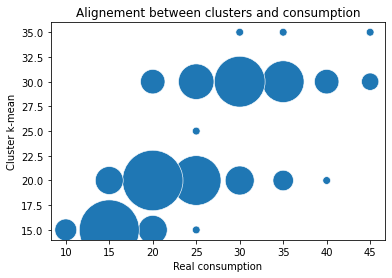

In [40]:
confNN = pd.DataFrame(columns=['real','real_consumption','predicted','predictionNN','density'])
for i in range (0, 8):
    for j in range (0,8) :
        if M_NN[i][j]>0 :
            new_row = pd.DataFrame({'real':i, 'real_consumption':dict_cat[i],'predicted':j,'predicted_cluster':dict_cat[j], 'density':float(M_NN[i][j])}, index=[0])
            confNN=pd.concat([confNN,new_row], ignore_index = True)             
sns.scatterplot(x='real_consumption', y='predicted_cluster', s=(confNN.density)*60, data=confNN) 
pl.xlabel('Real consumption')
pl.ylabel('Cluster k-mean')
pl.title('Alignement between clusters and consumption')
show

## Clustering

When initial data are not labelled, groups need to be created base on similarity.
This is unsupervised learning.
Here we will use a classical clustering analysis method: k-mean.

In [41]:
print(Norm[Input_cols])

     Cylinders  Cubic_inch  Horsepower    Weight  Acceleration
0          0.2    0.028424    0.065217  0.052569      0.619632
1          0.2    0.072351    0.125000  0.161290      0.582822
2          0.2    0.077519    0.239130  0.183990      0.429448
3          0.2    0.124031    0.157609  0.178315      0.337423
4          0.2    0.000000    0.016304  0.065114      0.674847
..         ...         ...         ...       ...           ...
337        0.2    0.028424    0.114130  0.104839      0.460123
338        0.6    0.341085    0.211957  0.424432      0.503067
339        0.6    0.341085    0.211957  0.400538      0.595092
340        0.2    0.103359    0.255435  0.221625      0.429448
341        0.2    0.074935    0.114130  0.124253      0.570552

[342 rows x 5 columns]


In [42]:
Norm.dtypes

Consumption            category
Cylinders               float64
Cubic_inch              float64
Horsepower              float64
Weight                  float64
Acceleration            float64
conso_group            category
Consumption_encoded       int64
PCA0                    float64
PCA1                    float64
Prediction_GNB            int64
Prediction_NN             int64
dtype: object

In [43]:
from sklearn import cluster
from sklearn.cluster import KMeans 
from sklearn.metrics import completeness_score, homogeneity_score

In [44]:
Nombre_clusters=8#cluster nombers matching rhe numbers of species
kmeans = KMeans(n_clusters=Nombre_clusters, init='random',n_init='auto') # initialization 
kmeans.fit(Norm[Input_cols]) #K-means training
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
    
    
print('Coordinates of the  3 centroids')
print(centroids)


Coordinates of the  3 centroids
[[0.6        0.28886169 0.37614416 0.37640697 0.33903778]
 [0.6037037  0.41803043 0.27787842 0.50991194 0.55203363]
 [0.19272727 0.15362932 0.26205534 0.28476159 0.3923034 ]
 [0.1971831  0.07391637 0.14344764 0.12804786 0.42979348]
 [1.         0.64887533 0.51915538 0.69110994 0.31771095]
 [0.20740741 0.16413054 0.1952496  0.33376477 0.64121791]
 [1.         0.85281654 0.77195652 0.83273596 0.17865031]
 [0.2        0.05374677 0.08278986 0.11833931 0.6795501 ]]


In [45]:
# actual prediction
y_pred = kmeans.predict(Norm[Input_cols])

print("shape of y_pred:", y_pred.shape)
print("y_pred:", y_pred[0])
Norm = Norm.drop(columns=[col for col in Norm.columns if "Prediction_kmean" in col.lower()])

print("norm :", Norm)
# On crée directement une colonne dans Norm
Norm['Prediction_kmean'] = y_pred
print(Norm.dtypes)

print(Norm)
print("prediction k-mean")
print(Norm["Prediction_kmean"])




shape of y_pred: (342,)
y_pred: 7
norm :     Consumption  Cylinders  Cubic_inch  Horsepower    Weight  Acceleration  \
0            35        0.2    0.028424    0.065217  0.052569      0.619632   
1            25        0.2    0.072351    0.125000  0.161290      0.582822   
2            25        0.2    0.077519    0.239130  0.183990      0.429448   
3            25        0.2    0.124031    0.157609  0.178315      0.337423   
4            30        0.2    0.000000    0.016304  0.065114      0.674847   
..          ...        ...         ...         ...       ...           ...   
337          30        0.2    0.028424    0.114130  0.104839      0.460123   
338          20        0.6    0.341085    0.211957  0.424432      0.503067   
339          20        0.6    0.341085    0.211957  0.400538      0.595092   
340          25        0.2    0.103359    0.255435  0.221625      0.429448   
341          30        0.2    0.074935    0.114130  0.124253      0.570552   

    conso_group  Consu

    Consumption  Cylinders  Cubic_inch  Horsepower    Weight  Acceleration  \
0            35        0.2    0.028424    0.065217  0.052569      0.619632   
1            25        0.2    0.072351    0.125000  0.161290      0.582822   
2            25        0.2    0.077519    0.239130  0.183990      0.429448   
3            25        0.2    0.124031    0.157609  0.178315      0.337423   
4            30        0.2    0.000000    0.016304  0.065114      0.674847   
..          ...        ...         ...         ...       ...           ...   
337          30        0.2    0.028424    0.114130  0.104839      0.460123   
338          20        0.6    0.341085    0.211957  0.424432      0.503067   
339          20        0.6    0.341085    0.211957  0.400538      0.595092   
340          25        0.2    0.103359    0.255435  0.221625      0.429448   
341          30        0.2    0.074935    0.114130  0.124253      0.570552   

    conso_group  Consumption_encoded      PCA0      PCA1  Predi

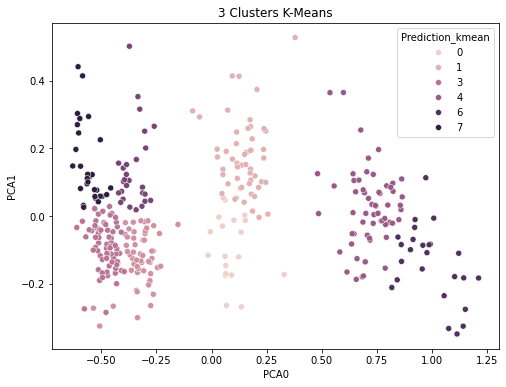

In [46]:
print(Norm)

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='PCA0', y='PCA1', hue='Prediction_kmean', data=Norm) 
pl.title('3 Clusters K-Means')
pl.show()

We can compare these clusterswith the reality to obtain the performance.



In [47]:
print (completeness_score(Norm['Consumption_encoded'],Norm['Prediction_kmean']))

0.33996162714915706


Completeness is near to 1 when all elements of a class belong to the same cluster.

In [48]:
print (homogeneity_score(Norm['Consumption_encoded'],Norm['Prediction_kmean']))

0.37486600734391656


Homogeneity is near to 1 when all elements of a cluster belong to the same class.

Visualization also enables to confront clustering to reality.

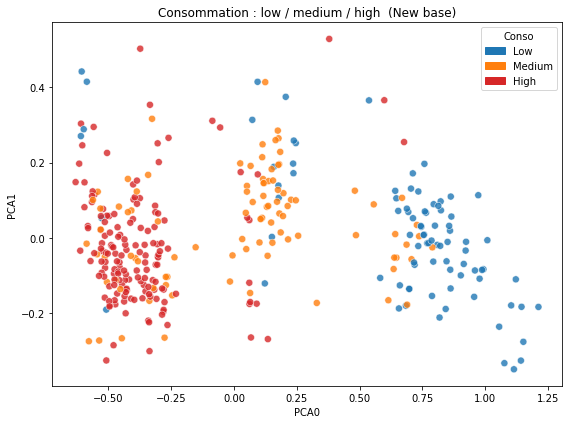

Text(0.5, 1.0, '3 Clusters K-Means')

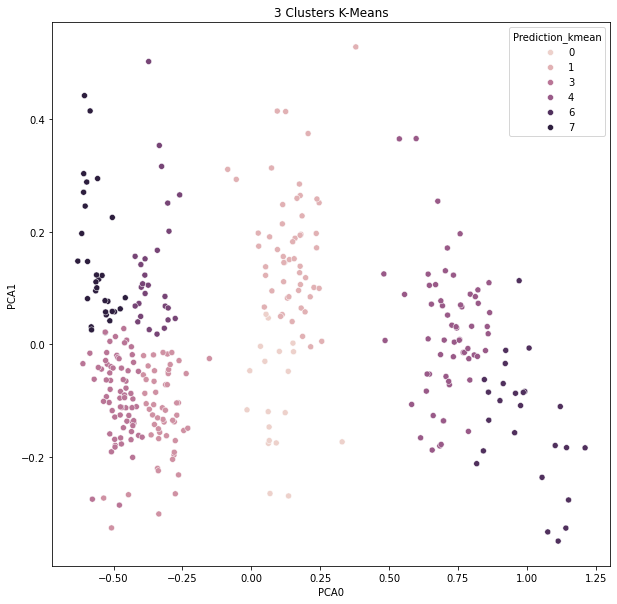

In [49]:
plot_with_color_groups(Norm, consumption_col='Consumption_encoded', x_col='PCA0', y_col='PCA1', mode='quantile', title=' (New base)')
figure = plt.figure(figsize = (10, 10))
plt.tight_layout()
sns.scatterplot(x='PCA0', y='PCA1', hue='Prediction_kmean', data=Norm) 
plt.title('3 Clusters K-Means')

In [50]:
M2=confusion_matrix(Norm['Consumption_encoded'],Norm['Prediction_kmean'])
print (M2)

[[ 1  0  5 22  0  2  0  7]
 [ 6  4 26 11  2 11  0  4]
 [ 1  1 11 28  0  7  0 10]
 [ 0  1  0  7  0  0  0  3]
 [ 9 38 13  2 15  7  0  1]
 [ 2 10  0  0 43  0 18  0]
 [ 0  0  0  1  0  0  0  5]
 [ 0  0  0  0  1  0  7  0]]


!!!BEWARE!!!!
Here perfect identification does not mean diagonal matrix. It does not matter if setosa are clustern°1, n° 2 or n°3. 

Let's represent it graphicaly.

/tmp/ipykernel_61002/3095097245.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conf1=pd.concat([conf1,new_row], ignore_index = True)


<function matplotlib.pyplot.show(close=None, block=None)>

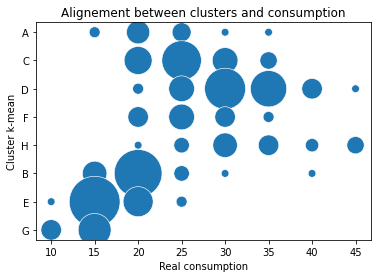

In [51]:
dict_cluster={0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H'}
conf1 = pd.DataFrame(columns=['real','real_consumption','predicted','predicted_cluster','density'])
for i in range (0, 8):
    for j in range (0,8) :
        if M2[i][j]>0 :
            new_row = pd.DataFrame({'real':i, 'real_consumption':dict_cat[i],'predicted':j,'predicted_cluster':dict_cluster[j], 'density':float(M2[i][j])}, index=[0])
            conf1=pd.concat([conf1,new_row], ignore_index = True)             
sns.scatterplot(x='real_consumption', y='predicted_cluster', s=(conf1.density)*60, data=conf1) 
pl.xlabel('Real consumption')
pl.ylabel('Cluster k-mean')
pl.title('Alignement between clusters and consumption')
show

In [52]:
print (classification_report(Norm['Consumption_encoded'],Norm['Prediction_kmean']))

              precision    recall  f1-score   support

           0       0.05      0.03      0.04        37
           1       0.07      0.06      0.07        64
           2       0.20      0.19      0.19        58
           3       0.10      0.64      0.17        11
           4       0.25      0.18      0.21        85
           5       0.00      0.00      0.00        73
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         8

    accuracy                           0.11       342
   macro avg       0.08      0.14      0.08       342
weighted avg       0.12      0.11      0.11       342



To "match" the clusters to the real labels (here species) we can use the following function 

In [53]:
#This function find the best fit between clusters and labels
from itertools import permutations # import this into script.
#tested with python 3.6
def remap_labels(pred_labels, true_labels):
    """Rename prediction labels (clustered output) to best match true labels."""
   
    pred_labels, true_labels = np.array(pred_labels), np.array(true_labels)
    assert pred_labels.ndim == 1 == true_labels.ndim
    assert len(pred_labels) == len(true_labels)
    cluster_names = np.unique(pred_labels)
    accuracy = 0

    perms = np.array(list(permutations(np.unique(true_labels))))

    remapped_labels = true_labels
    for perm in perms:
        flipped_labels = np.zeros(len(true_labels))
        for label_index, label in enumerate(cluster_names):
            flipped_labels[pred_labels == label] = perm[label_index]

        testAcc = np.sum(flipped_labels == true_labels) / len(true_labels)
        if testAcc > accuracy:
            accuracy = testAcc
            remapped_labels = flipped_labels            
            dict_map= dict(enumerate(perm, 0))
            #print(dict_map)

    return accuracy, remapped_labels,dict_map


In [54]:
acc,y_pred,dict_map_cluster =remap_labels(Norm['Prediction_kmean'],Norm['Consumption_encoded'])
print(dict_map_cluster)
#We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Prediction_kmean_mapped']

#we merge this dataframe with df
Norm= pd.concat([Norm,pred], axis = 1)

{0: np.int64(3), 1: np.int64(4), 2: np.int64(1), 3: np.int64(2), 4: np.int64(5), 5: np.int64(0), 6: np.int64(7), 7: np.int64(6)}


This dictionnary gives us the relationship between clusters and species. We can use it to represent the "traditional" confusion matrix.


In [55]:
M_KM=confusion_matrix(Norm['Consumption_encoded'],Norm['Prediction_kmean_mapped'])
print (M_KM)

[[ 2  5 22  1  0  0  7  0]
 [11 26 11  6  4  2  4  0]
 [ 7 11 28  1  1  0 10  0]
 [ 0  0  7  0  1  0  3  0]
 [ 7 13  2  9 38 15  1  0]
 [ 0  0  0  2 10 43  0 18]
 [ 0  0  1  0  0  0  5  0]
 [ 0  0  0  0  0  1  0  7]]


   real real_name predicted  density
0     0        35         0      2.0
1     0        35         1      5.0
2     0        35         2     22.0
3     0        35         3      1.0
4     0        35         6      7.0
5     1        25         0     11.0
6     1        25         1     26.0
7     1        25         2     11.0
8     1        25         3      6.0
9     1        25         4      4.0
10    1        25         5      2.0
11    1        25         6      4.0
12    2        30         0      7.0
13    2        30         1     11.0
14    2        30         2     28.0
15    2        30         3      1.0
16    2        30         4      1.0
17    2        30         6     10.0
18    3        40         2      7.0
19    3        40         4      1.0
20    3        40         6      3.0
21    4        20         0      7.0
22    4        20         1     13.0
23    4        20         2      2.0
24    4        20         3      9.0
25    4        20         4     38.0
2

/tmp/ipykernel_61002/2142403627.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conf_KM=pd.concat([conf_KM,new_row], ignore_index=True)


<function matplotlib.pyplot.show(close=None, block=None)>

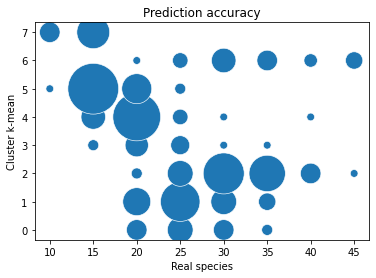

In [56]:
conf_KM = pd.DataFrame(columns=['real','real_name','predicted','density'])
for i in range (0, 8):
    for j in range (0,8) :
        if M_KM[i][j]>0 :
            new_row = pd.DataFrame({'real':i, 'real_name':dict_cat[i],'predicted':j, 'density':float(M_KM[i][j])}, index=[0])
            conf_KM=pd.concat([conf_KM,new_row], ignore_index=True)
            
print(conf_KM)
sns.scatterplot(x='real_name', y='predicted', s=(conf_KM.density)*60, data=conf_KM) 
pl.xlabel('Real species')
pl.ylabel('Cluster k-mean')
pl.title('Prediction accuracy')
show

# Export of the results

The following lines create a .csv file that encompass the predicted species.

In [57]:
nb_specimen=len(data_panda)

In [58]:
import csv

print(Norm)
# writing the csv file
with open('my_prediction_MPG_on_train_set.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # writing the header
    writer.writerow(['car', 'Consumption','Prediction GNB', 'Prediction k-means','Prediction NN'])
    # writing the data

    for i in range(nb_specimen):
        writer.writerow([i, Norm.loc[i,'Consumption'],dict_cat[Norm.loc[i,'Prediction_GNB']], dict_cat[int(Norm.loc[i,'Prediction_kmean_mapped'])],dict_cat[int(Norm.loc[i,'Prediction_NN'])]])


    Consumption  Cylinders  Cubic_inch  Horsepower    Weight  Acceleration  \
0            35        0.2    0.028424    0.065217  0.052569      0.619632   
1            25        0.2    0.072351    0.125000  0.161290      0.582822   
2            25        0.2    0.077519    0.239130  0.183990      0.429448   
3            25        0.2    0.124031    0.157609  0.178315      0.337423   
4            30        0.2    0.000000    0.016304  0.065114      0.674847   
..          ...        ...         ...         ...       ...           ...   
337          30        0.2    0.028424    0.114130  0.104839      0.460123   
338          20        0.6    0.341085    0.211957  0.424432      0.503067   
339          20        0.6    0.341085    0.211957  0.400538      0.595092   
340          25        0.2    0.103359    0.255435  0.221625      0.429448   
341          30        0.2    0.074935    0.114130  0.124253      0.570552   

    conso_group  Consumption_encoded      PCA0      PCA1  Predi

Prédiction sur le dataset de test

In [ ]:
test_set = pd.read_csv('mpgTestSet.csv')
#print(test_set)

import copy
TestNorm=copy.deepcopy(data_panda.iloc[:, :5])
TestNorm = TestNorm.apply(pd.to_numeric, downcast='integer', errors='coerce')
#print(TestNorm)
#print(TestNorm.dtypes)
Input_cols = ['Cylinders','Cubic_inch','Horsepower','Weight','Acceleration']
TestNorm[Input_cols]=(data_panda[Input_cols]-data_panda[Input_cols].min())/(data_panda[Input_cols].max()-data_panda[Input_cols].min())
#print(TestNorm.keys())

prediction_test_GNB =classifier_GNB.predict(TestNorm[Input_cols]) #prediction
pred_GNB = pd.DataFrame(prediction_test_GNB )
pred_GNB.columns = ['Prediction_GNB']

TestNorm= pd.concat([TestNorm,pred_GNB], axis = 1)

print(TestNorm.head())


y_pred = kmeans.predict(TestNorm[Input_cols])

print("shape of y_pred:", y_pred.shape)
print("y_pred:", y_pred[0])
TestNorm = TestNorm.drop(columns=[col for col in Norm.columns if "Prediction_kmean" in col.lower()])

print("norm :", TestNorm)
# On crée directement une colonne dans Norm
for i in range(nb_specimen):
    print("Before mapping: Cluster ", y_pred[i], " mapped to ", dict_map_cluster[y_pred[i]])
    y_pred[i] = dict_map_cluster[y_pred[i]]

TestNorm['Prediction_kmean'] = y_pred
print(TestNorm.dtypes)

print(TestNorm)
print("prediction k-mean")
print(TestNorm["Prediction_kmean"])

"""
acc,y_pred,dict_map_cluster =remap_labels(TestNorm['Prediction_kmean'],TestNorm['Consumption_encoded'])
print(dict_map_cluster)
#We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Prediction_kmean_mapped']"""

#we merge this dataframe with df
TestNorm= pd.concat([TestNorm,pred], axis = 1)


#application on the whole set
prediction_NN =classifier_NN.predict(TestNorm[Input_cols]) #prediction
pred_NN = pd.DataFrame(prediction_NN )
pred_NN.columns = ['Prediction_NN']

#we merge this dataframe with df
TestNorm= pd.concat([TestNorm,pred_NN], axis = 1)


import csv

# writing the csv file
with open('my_prediction_MPG_on_test_set.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # writing the header
    writer.writerow(['car', 'Consumption','Prediction GNB', 'Prediction k-means','Prediction NN'])
    # writing the data

    for i in range(nb_specimen):
        writer.writerow([i,dict_cat[TestNorm.loc[i,'Prediction_GNB']], dict_cat[int(TestNorm.loc[i,'Prediction_kmean'])],dict_cat[int(TestNorm.loc[i,'Prediction_NN'])]])




   Consumption  Cylinders  Cubic_inch  Horsepower    Weight  Acceleration  \
0           35        0.2    0.028424    0.065217  0.052569      0.619632   
1           25        0.2    0.072351    0.125000  0.161290      0.582822   
2           25        0.2    0.077519    0.239130  0.183990      0.429448   
3           25        0.2    0.124031    0.157609  0.178315      0.337423   
4           30        0.2    0.000000    0.016304  0.065114      0.674847   

   Prediction_GNB  
0               3  
1               2  
2               2  
3               2  
4               2  
shape of y_pred: (342,)
y_pred: 7
norm :      Consumption  Cylinders  Cubic_inch  Horsepower    Weight  Acceleration  \
0             35        0.2    0.028424    0.065217  0.052569      0.619632   
1             25        0.2    0.072351    0.125000  0.161290      0.582822   
2             25        0.2    0.077519    0.239130  0.183990      0.429448   
3             25        0.2    0.124031    0.157609  0.17831